In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

data = pd.read_csv("/content/sample_data/onlinefoods.csv")
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


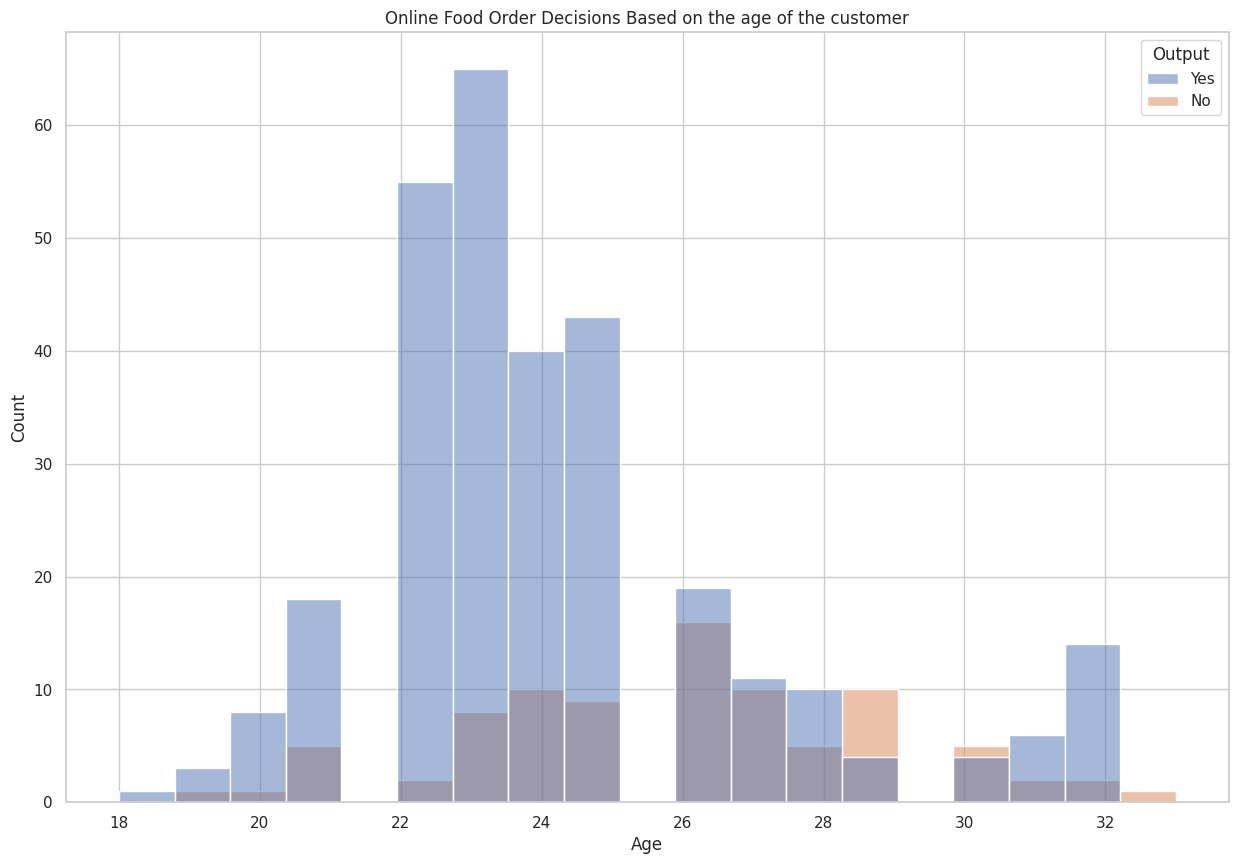

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the age of the customer")
sns.histplot(x="Age", hue="Output", data = data)
plt.show()

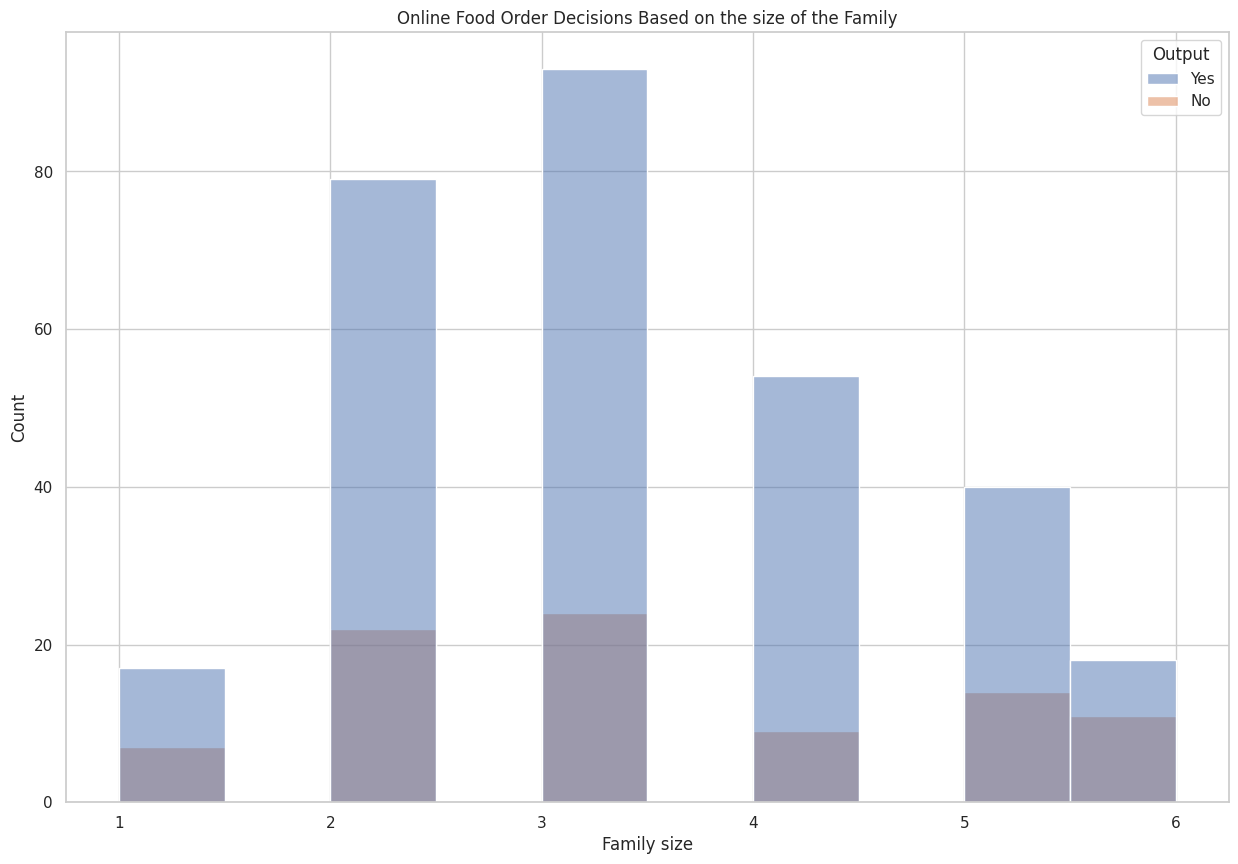

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the size of the Family")
sns.histplot(x="Family size", hue="Output", data = data)
plt.show()

In [ ]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male vs Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
marital = buying_again_data['Marital Status'].value_counts()
label = marital.index
counts = marital.values
colors = ['gold', 'lightgreen']

fig =go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married vs Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
# Convert categorical features into numerical values

data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Emplyeed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "post Graduate": 2,
                                                                             "Ph.D": 3,
                                                                             "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                    "25001 to 50000": 5000,
                                                    "More than 50000": 7000,
                                                    "10001 to 25000": 25000,
                                                    "Below Rs. 10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1         1.0             0.0   
1   24       0               1         1.0             NaN   
2   22       1               1         1.0             NaN   
3   22       0               1         1.0             0.0   
4   22       1               1         1.0             NaN   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                         NaN            4   12.9766    77.5993    560001   
1                         1.0            3   12.9770    77.5773    560009   
2                         NaN            3   12.9551    77.6593    560017   
3                         1.0            6   12.9473    77.5616    560019   
4                         NaN            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes       1.0         Yes  
1    Yes       1.0         Yes  
2    Yes       NaN         Yes  
3    Yes       1.0         Yes  

In [ ]:
data.corr()

ValueError: could not convert string to float: 'Yes'

In [ ]:
# Train a model to predict whether a customer will order again or not.

#splitting data

from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and target variable, respectively
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

# Instantiate the imputer with a strategy, such as mean, median, or most frequent
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
xtrain_imputed = imputer.fit_transform(xtrain)

# Transform the test data using the trained imputer
xtest_imputed = imputer.transform(xtest)

model = RandomForestClassifier()
model.fit(xtrain_imputed, ytrain)
print(model.score(xtest_imputed, ytest))

<ipython-input-11-29f4f1d2a7f9>:20: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8974358974358975


In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again


KeyboardInterrupt: Interrupted by user

#Summary
So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast. I hope you liked this article on Online Food Delivery Prediction with Machine Learning. Feel free to ask valuable questions in the comments section below.